# Case Study on Supervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Read dataset into the enviroment**

In [2]:
data = pd.read_excel(r'D:\ICT DSA\Datasets-20211106\iris_supervised.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

iris dataset has 150 rows and 5 columns. The dataset contains the measurement of length and width of sepals and petals, in centimeters and their respective species.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


'Classification' is the categorical variable

In [5]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

We have 3 species of flowers given, each having a sample size 50.

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


'PL' has a higher standard deviation as compared to other features. 'SL' has the highest mean and 'PW' has the lowest.

Our objective is to construct a model which predicts the iris species with the highest accuracy.

# **Data Preprocessing**

**Missing Values**

In [7]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

'SL' has 7 missing values, while 'SW' and 'PL' each has 6 missing values.

We can fill the missing values in 'SL', 'SW', and 'PL' with mean values of their respective columns.

In [8]:
for i in ['SL', 'SW', 'PL']:
    data[i] = data[i].fillna(data[i].mean())

In [9]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**Outliers**

We can check for outliers in the features by plotting their respective boxplots.

Text(0.5, 1.0, 'Boxplot of Sepal Length')

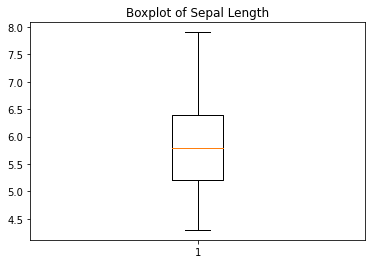

In [10]:
plt.boxplot(data['SL'])
plt.title('Boxplot of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

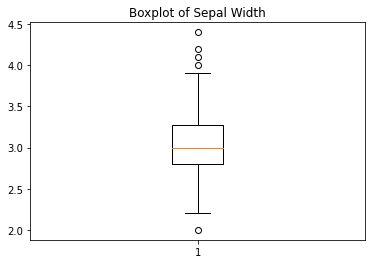

In [11]:
plt.boxplot(data['SW'])
plt.title('Boxplot of Sepal Width')

Text(0.5, 1.0, 'Boxplot of Petal Length')

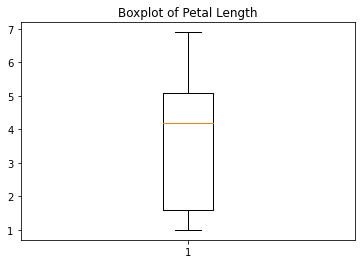

In [12]:
plt.boxplot(data['PL'])
plt.title('Boxplot of Petal Length')

Text(0.5, 1.0, 'Boxplot of Petal Width')

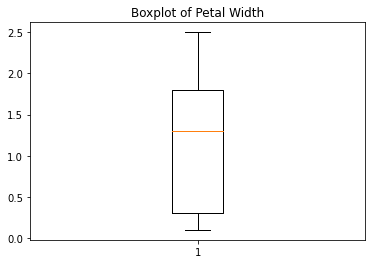

In [13]:
plt.boxplot(data['PW'])
plt.title('Boxplot of Petal Width')

'SW' has outliers, as seen from the plots above. We can remove outliers by IQR method.

In [14]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print('IQR:', IQR)

IQR: 0.4500000000000002


In [15]:
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR
print(low)
print(high)

2.1249999999999996
3.9250000000000003


Any value smaller than 'low' and greater than 'high' will be taken as outliers.

In [16]:
out_1 = data['SW'] < low
ind_1 = data.loc[out_1].index
print(ind_1)

Int64Index([60], dtype='int64')


In [17]:
out_2 = data['SW']> high
ind_2 = data.loc[out_2].index
print(ind_2)

Int64Index([14, 15, 32, 33], dtype='int64')


We can now drop the rows having outliers with indices given in 'ind_1' and 'ind_2'.

In [18]:
data.drop([60,14, 15, 32, 33], inplace=True)

In [19]:
data.head(5)

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [20]:
data.shape

(145, 5)

The dataset has now 145 rows and 5 columns.

**Splitting the dataset**

In [21]:
x = data.drop('Classification', axis=1)
y = data['Classification']

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, test_size = 0.2)
print('xtrain shape:', xtrain.shape)
print('xtest shape:', xtest.shape)
print('ytrain shape:', ytrain.shape)
print('ytest shape:', ytest.shape)

xtrain shape: (116, 4)
xtest shape: (29, 4)
ytrain shape: (116,)
ytest shape: (29,)


# Classification Modelling

**kNN Classification**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
#we have to find the optimum value for k
acc_values = []
neighbors = np.arange(2,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model = classifier.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    acc = accuracy_score(ytest, pred)
    acc_values.append(acc)

In [25]:
print(acc_values)

[0.8620689655172413, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.896551724137931, 0.9310344827586207]


Text(0, 0.5, 'accuracy score')

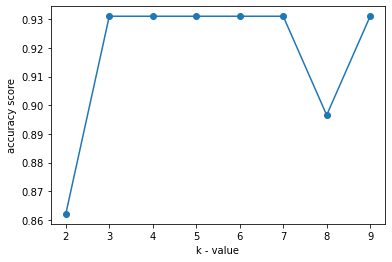

In [26]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k - value')
plt.ylabel('accuracy score')

From the above plot, we can see that k at 3, 4, 5, 6, 7 and 9 produce models with highest accuracy. We choose any one of the k values, say k = 6.

In [27]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'euclidean')
model = classifier.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [28]:
print('accuracy is:', accuracy_score(ytest, pred))

accuracy is: 0.9310344827586207


In [29]:
confusion_matrix(ytest, pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

The k Nearest Neighbors classification has an accuracy of 0.931 and has 2 misclassifications.

**Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class = 'multinomial')
model = log.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [31]:
print('accuracy score:', accuracy_score(ytest, pred))

accuracy score: 0.896551724137931


In [32]:
confusion_matrix(ytest, pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

Logistic Regression gives a model of accuracy 0.897 and has 3 misclassifications.

**Decision Tree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [34]:
print('accuracy score:', accuracy_score(ytest, pred))

accuracy score: 0.896551724137931


In [35]:
confusion_matrix(ytest, pred)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

Decision Tree classifier gives a model of accuracy 0.897 and has 3 misclassifications.

**Support Vector Machine**

The Support Vector Classification can be done with different kernels, mainly radial, polynomial and linear kernel.

Radial SVM

In [36]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf')
model = svm_rbf.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [37]:
print('accuracy score is', accuracy_score(ytest, pred))

accuracy score is 0.8620689655172413


In [38]:
print(confusion_matrix(ytest, pred))

[[9 0 0]
 [0 8 1]
 [0 3 8]]


Radial SVM classifies the test data with an accuracy of 0.86 and has 4 misclassifications.

Polynomial SVM

In [39]:
svm_poly = SVC(kernel='poly', degree=3)
model = svm_poly.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [40]:
print('accuracy score is', accuracy_score(ytest, pred))

accuracy score is 0.9655172413793104


In [41]:
print(confusion_matrix(ytest, pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Polynomial SVM classifies the test data with an accuracy of 0.966 and has 1 misclassification.

Linear SVM

In [42]:
svm_linear = SVC(kernel='linear')
model = svm_linear.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [43]:
print('accuracy score is', accuracy_score(ytest, pred))

accuracy score is 0.896551724137931


In [44]:
print(confusion_matrix(ytest, pred))

[[9 0 0]
 [0 8 1]
 [0 2 9]]


Linear SVM classifies the test data with an accuracy of 0.897 and has 3 misclassifications.

Hence, we can see that out of the three Supprt Vector Classifications, polynomial SVM of degree 3 gives model with highest accuracy of 0.966, and has only 1 misclassification.

**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [46]:
print('accuracy score is', accuracy_score(ytest, pred))

accuracy score is 0.9310344827586207


In [47]:
print(confusion_matrix(ytest, pred))

[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Random Forest Classifier gives a model of accuracy 0.931 and has 2 misclassifications.

From the above classification models, Support Vector Machine with polynomial kernel of degree 3 gives the highest accuracy and lowest misclassifications.